In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nurrahmadiah","key":"f0ff4ee78f01de39dfb360ab00628a9f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [46]:
!kaggle datasets download -d cherngs/heart-disease-cleveland-uci

Dataset URL: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci
License(s): reddit-api
  0% 0.00/3.33k [00:00<?, ?B/s]
100% 3.33k/3.33k [00:00<00:00, 6.18MB/s]


In [47]:
!unzip heart-disease-cleveland-uci.zip -d heart-disease-cleveland-uci
!ls heart-disease-cleveland-uci

Archive:  heart-disease-cleveland-uci.zip
  inflating: heart-disease-cleveland-uci/heart_cleveland_upload.csv  
heart_cleveland_upload.csv


In [50]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [51]:
df = pd.read_csv("/content/heart-disease-cleveland-uci/heart_cleveland_upload.csv")

In [52]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [54]:
df.drop(columns=['age','sex','cp','restecg','chol'], inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   trestbps   297 non-null    int64  
 1   fbs        297 non-null    int64  
 2   thalach    297 non-null    int64  
 3   exang      297 non-null    int64  
 4   oldpeak    297 non-null    float64
 5   slope      297 non-null    int64  
 6   ca         297 non-null    int64  
 7   thal       297 non-null    int64  
 8   condition  297 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 21.0 KB


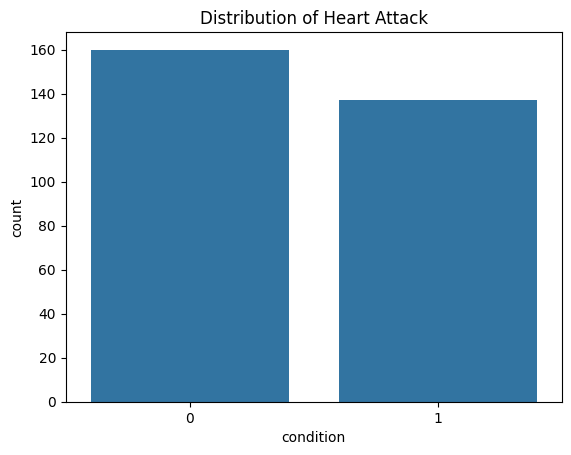

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='condition', data=df)
plt.title('Distribution of Heart Attack')
plt.show()

In [58]:
X = df.drop("condition",axis=1)
Y = pd.get_dummies(df['condition'])

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [60]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (222, 8)
Shape of Y_train is: (222, 2)

Shape of X_test is: (75, 8)
Shape of Y_test is: (75, 2)


In [61]:
input_dim = X.shape[1]

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Concatenate
model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation = "relu", kernel_initializer='normal'))
model.add(Dense(2, activation = 'sigmoid'))

In [63]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 5)                 45        
                                                                 
 dense_5 (Dense)             (None, 2)                 12        
                                                                 
Total params: 129 (516.00 Byte)
Trainable params: 129 (516.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
result = model.fit(X_train, Y_train, epochs = 20, batch_size = 10)

Epoch 1/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.7432
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.7432
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.7568
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.7072
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.7613
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.7568
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7748
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.7748
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.7432
Epoch 10/20
23/23 [==============================] - 0s 3ms/step - loss: 0.5005 - accuracy: 0.7748
Epoch 11/20
23/23 [

In [67]:
y_pred =model.predict(X_test)
y_pred = (y_pred>0.5)

3/3 [==============================] - 0s 3ms/step


In [68]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8133333333333334


In [69]:
model.save('./heartdisease.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [70]:
model = tf.keras.models.load_model('./heartdisease.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./heartdisease.tflite", "wb").write(tflite_model)

2612